# Linear Regression Model Interpretability




## **1. Abstract**

The insurance risk are important point of estimation for the insurance company. The aim of the notebook is to find the factors affecting the this and creating a regression model to predict this. Interpreting the linear model using azure interpretation and dashboard.



## **2. Importing necessary libraries**

In [1]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor

## **3. Data Loading and Preprocessing**

In [2]:
#Reading the ablone data

data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Seeing the data in the file 
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### **3.1. Encoding the sex and  smoker**

In [4]:

data['sex'] = data.sex.map({'male':0, 'female':1})

data['smoker'] = data.smoker.map({'no':0, 'yes':1})
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560
8,37,0,29.830,2,0,northeast,6406.41070
9,60,1,25.840,0,0,northwest,28923.13692


In [5]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## **3.2. One Hot Encoding**

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [7]:
# creating instance of one-hot-encoder
enc = OneHotEncoder()
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(data[['region']]).toarray())
enc_df
enc_df.columns = ['northeast','northwest','southeast','southwest'] 

enc_df.apply(np.int64)
data =data.join(enc_df)
data=data.drop(['region'],axis=1)
data

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,1,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,1,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,1,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

## **3.3. Noramlizing the data**

In [9]:

# Normalizing the data in the rings column beacuse the value is too high when compared to independent variable

from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = data[['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()


# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)


# Run the normalizer on the dataframe
data[['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest']] = pd.DataFrame(x_scaled)



In [10]:
#looking at data head after adding dummy variables and nromalizing
data.head(20)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,0.021739,1.0,0.321227,0.0,1.0,0.251611,0.0,0.0,0.0,1.0
1,0.000000,0.0,0.479150,0.2,0.0,0.009636,0.0,0.0,1.0,0.0
2,0.217391,0.0,0.458434,0.6,0.0,0.053115,0.0,0.0,1.0,0.0
3,0.326087,0.0,0.181464,0.0,0.0,0.333010,0.0,1.0,0.0,0.0
4,0.304348,0.0,0.347592,0.0,0.0,0.043816,0.0,1.0,0.0,0.0
5,0.282609,1.0,0.263115,0.0,0.0,0.042056,0.0,0.0,1.0,0.0
6,0.608696,1.0,0.470272,0.2,0.0,0.113629,0.0,0.0,1.0,0.0
7,0.413043,1.0,0.316922,0.6,0.0,0.098320,0.0,1.0,0.0,0.0
8,0.413043,0.0,0.373150,0.4,0.0,0.084352,1.0,0.0,0.0,0.0
9,0.913043,1.0,0.265806,0.0,0.0,0.443765,0.0,1.0,0.0,0.0


In [11]:
#finding the correlation between all the features in the data
data.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

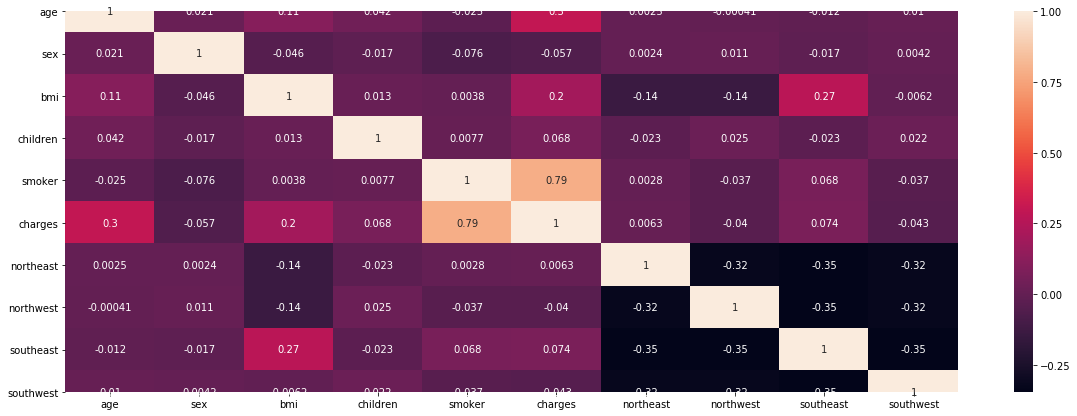

In [13]:
#plotting the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

In [14]:
#The column names 
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

## **3.4. Train ,Validation and Test split**

Data is split into 3 parts 

Taining data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [20]:
from sklearn.model_selection import  train_test_split

X = data[ ['age', 'sex', 'bmi', 'children', 'smoker', 'northeast',
       'northwest', 'southeast', 'southwest']]

y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## **4. Tarining Linear Regression model**

In [22]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
model = regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_train)

In [24]:
#training Data
# The coefficients
Weights = regr.coef_
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))


Coefficients: 
 [ 0.18906344  0.00386526  0.19082142  0.03256747  0.37968133  0.00932785
  0.00300533 -0.00724677 -0.00508642]
Mean squared error: 0.01
Coefficient of determination: 0.75


## **5. Importing SHAP and other required libraries**

In [29]:
from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor

# Explainers:
# 1. SHAP Tabular Explainer
from interpret.ext.blackbox import TabularExplainer

# OR

# 2. Mimic Explainer
#from interpret.ext.blackbox import MimicExplainer
# You can use one of the following four interpretable models as a global surrogate to the black box model
from interpret.ext.glassbox import LGBMExplainableModel
from interpret.ext.glassbox import LinearExplainableModel
from interpret.ext.glassbox import SGDExplainableModel
from interpret.ext.glassbox import DecisionTreeExplainableModel

Could not import lightgbm, required if using LGBMExplainableModel


In [30]:
data.columns
featu_na = a = np.array(['age', 'sex', 'bmi', 'children', 'smoker', 'northeast',
       'northwest', 'southeast', 'southwest'])
featu_na.shape

(9,)

In [31]:
explainer = TabularExplainer(model,X_train,features =featu_na)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


In [32]:
global_explanation = explainer.explain_global(X_test)

In [33]:
print('ranked global importance values: {}'.format(global_explanation.get_ranked_global_values()))
# Corresponding feature names
print('ranked global importance names: {}'.format(global_explanation.get_ranked_global_names()))
# Feature ranks (based on original order of features)
print('global importance rank: {}'.format(global_explanation.global_importance_rank))

ranked global importance values: [0.1231091142963841, 0.052294811694756034, 0.025081079724520398, 0.006450031429257199, 0.0033721566189628327, 0.0029584481739281265, 0.0019334396654515267, 0.0018274986099267433, 0.0011092778641650237]
ranked global importance names: ['smoker', 'age', 'bmi', 'children', 'northeast', 'southeast', 'sex', 'southwest', 'northwest']
global importance rank: [4, 0, 2, 3, 5, 7, 1, 8, 6]


In [34]:
# Print out a dictionary that holds the sorted feature importance names and values
print('global importance rank: {}'.format(global_explanation.get_feature_importance_dict()))

global importance rank: {'smoker': 0.1231091142963841, 'age': 0.052294811694756034, 'bmi': 0.025081079724520398, 'children': 0.006450031429257199, 'northeast': 0.0033721566189628327, 'southeast': 0.0029584481739281265, 'sex': 0.0019334396654515267, 'southwest': 0.0018274986099267433, 'northwest': 0.0011092778641650237}


In [35]:
# Note: Do not run this cell if using PFIExplainer, it does not support local explanations
# feature shap values for all features and all data points in the training data
print('local importance values: {}'.format(global_explanation.local_importance_values))
#Generate local explanations

local importance values: [[-0.0822207029744028, -0.0018965069780328345, 0.02494936782899215, -0.007134407188902789, -0.07806531919676069, -0.002292733409836944, 0.002277874279321828, 0.001909895780168723, 0.001264473657230493], [0.0739621413581932, -0.0018965069780328345, 0.004465713091538641, -0.007134407188902789, -0.07806531919676069, -0.002292733409836944, 0.002277874279321828, 0.001909895780168723, 0.001264473657230493], [0.04930169225304648, -0.0018965069780328345, 0.03249597746910659, -0.007134407188902789, -0.07806531919676069, -0.002292733409836944, -0.0007274592334702261, 0.001909895780168723, -0.003821942933884648], [0.04108154255133091, 0.001968754862910276, 0.03059649068894175, 0.012406076664662015, -0.07806531919676069, -0.002292733409836944, -0.0007274592334702261, -0.005336871896357992, 0.001264473657230493], [-0.07400055327268723, -0.0018965069780328345, -0.042970118932037886, -0.0006209125710478547, -0.07806531919676069, -0.002292733409836944, -0.0007274592334702261, 

In [36]:
# You can pass a specific data point or a group of data points to the explain_local function

# E.g., Explain the first data point in the test set
local_explanation = explainer.explain_local(X_test)

# E.g., Explain the first five data points in the test set
# local_explanation_group = explainer.explain_local(x_test[0:4,:])

In [37]:
# Sorted local feature importance information; reflects the original feature order
sorted_local_importance_names = local_explanation.get_ranked_local_names()
sorted_local_importance_values = local_explanation.get_ranked_local_values()

print('sorted local importance names: {}'.format(sorted_local_importance_names))
print('sorted local importance values: {}'.format(sorted_local_importance_values))

sorted local importance names: [['bmi', 'northwest', 'southeast', 'southwest', 'sex', 'northeast', 'children', 'smoker', 'age'], ['age', 'bmi', 'northwest', 'southeast', 'southwest', 'sex', 'northeast', 'children', 'smoker'], ['age', 'bmi', 'southeast', 'northwest', 'sex', 'northeast', 'southwest', 'children', 'smoker'], ['age', 'bmi', 'children', 'sex', 'southwest', 'northwest', 'northeast', 'southeast', 'smoker'], ['southeast', 'children', 'northwest', 'sex', 'northeast', 'southwest', 'bmi', 'age', 'smoker'], ['smoker', 'bmi', 'children', 'northwest', 'southeast', 'southwest', 'sex', 'northeast', 'age'], ['age', 'bmi', 'children', 'southwest', 'northwest', 'sex', 'northeast', 'southeast', 'smoker'], ['age', 'northeast', 'sex', 'southeast', 'southwest', 'northwest', 'children', 'bmi', 'smoker'], ['northeast', 'southeast', 'southwest', 'northwest', 'sex', 'children', 'bmi', 'age', 'smoker'], ['smoker', 'sex', 'southwest', 'northwest', 'northeast', 'southeast', 'children', 'age', 'bmi']

In [38]:
from interpret_community.widget import ExplanationDashboard

## **6. Dashboard**

In [39]:
ExplanationDashboard(global_explanation, model, datasetX=X_test)

## **7. Conclusion**

The dashboard helps for both local and global interpretation, perturbation helps how changing one value affects the output. This helps immensely to understand the linear model.


## **8. Refrence** 

1. https://docs.microsoft.com/en-us/azure/machine-learning/how-to-machine-learning-interpretability
2. https://www.youtube.com/watch?v=EIvMxWfsOHo


Copyright 2020 Abhishek Gargha Maheshwarappa and Kartik Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Copyright 2020 Abhishek Garga Maheshwarappa and Kartik Kumar



Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.